# Analyse des ventes avec Pandas

## Partie A : Exploration des donnees

### charger le fichier csv :

In [72]:
import pandas as pd

def charger_csv(fichier):
    return pd.read_csv(fichier)
print(charger_csv('ventes.csv'))




           Date     Produit     Catégorie  Quantité  PrixUnitaire    Magasin
0    2022-04-13  Smartphone          Mode        10       1009.00       Lyon
1    2023-03-12    Pantalon  Électronique         2        782.86      Paris
2    2022-09-28    Pantalon          Mode        19       1159.62   Bordeaux
3    2022-04-17     Fromage  Électronique         9        782.64   Bordeaux
4    2022-03-13          TV          Mode         7       1279.01  Marseille
..          ...         ...           ...       ...           ...        ...
195  2023-04-17     T-shirt   Alimentaire        17       1122.68   Bordeaux
196  2022-08-21  Chaussures   Alimentaire         8        756.57       Lyon
197  2023-11-23      Laptop  Électronique         2        352.16       Lyon
198  2022-04-23  Chaussures          Mode         8       1349.86   Bordeaux
199  2023-05-12      Laptop  Électronique         7        578.92  Marseille

[200 rows x 6 columns]


### Afficher les 5 premieres lignes du dataset :

In [73]:
def afficher_5_lignes(fichier):
    return pd.read_csv(fichier, nrows=5)

print(afficher_5_lignes('ventes.csv'))

         Date     Produit     Catégorie  Quantité  PrixUnitaire    Magasin
0  2022-04-13  Smartphone          Mode        10       1009.00       Lyon
1  2023-03-12    Pantalon  Électronique         2        782.86      Paris
2  2022-09-28    Pantalon          Mode        19       1159.62   Bordeaux
3  2022-04-17     Fromage  Électronique         9        782.64   Bordeaux
4  2022-03-13          TV          Mode         7       1279.01  Marseille


### afficher les infos et stats du dataset :

In [74]:
df = pd.read_csv('ventes.csv')
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          200 non-null    object 
 1   Produit       200 non-null    object 
 2   Catégorie     200 non-null    object 
 3   Quantité      200 non-null    int64  
 4   PrixUnitaire  200 non-null    float64
 5   Magasin       200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None
         Quantité  PrixUnitaire
count  200.000000    200.000000
mean    10.155000    691.105900
std      5.506595    412.396293
min      1.000000     26.740000
25%      5.000000    316.852500
50%     10.000000    660.270000
75%     15.000000   1011.815000
max     19.000000   1484.990000


### identification du manque des valeurs :

In [75]:
def afficher_valeurs_manquantes(fichier):
    df = pd.read_csv(fichier)
    total_manquant = df.isnull().sum().sum()
    if total_manquant> 0:
        print(f'Il y a {total_manquant} valeurs manquantes')
    else:
        print('Il n y a pas de valeurs manquantes')

afficher_valeurs_manquantes('ventes.csv')

Il n y a pas de valeurs manquantes


## Partie B : Nettoyage et preparation :

### Convertir la colonne Date en type datetime : 

In [76]:
def covertir_date(fichier):
    df = pd.read_csv(fichier)
    df['Date'] = pd.to_datetime(df['Date'])
    print(df.info())
    return df

print(covertir_date('ventes.csv'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          200 non-null    datetime64[ns]
 1   Produit       200 non-null    object        
 2   Catégorie     200 non-null    object        
 3   Quantité      200 non-null    int64         
 4   PrixUnitaire  200 non-null    float64       
 5   Magasin       200 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.5+ KB
None
          Date     Produit     Catégorie  Quantité  PrixUnitaire    Magasin
0   2022-04-13  Smartphone          Mode        10       1009.00       Lyon
1   2023-03-12    Pantalon  Électronique         2        782.86      Paris
2   2022-09-28    Pantalon          Mode        19       1159.62   Bordeaux
3   2022-04-17     Fromage  Électronique         9        782.64   Bordeaux
4   2022-03-13          TV    

### Creer nouvelle colonne ChiffreAffaire=Quantite*PrixUnitaire

In [77]:
def chiffre_affaire(fichier):
    df = pd.read_csv(fichier)
    df['ChiffreAffaire'] = df['Quantité'] * df['PrixUnitaire']
    print(df.head())
    return df 

print(chiffre_affaire('ventes.csv'))  

         Date     Produit     Catégorie  Quantité  PrixUnitaire    Magasin  \
0  2022-04-13  Smartphone          Mode        10       1009.00       Lyon   
1  2023-03-12    Pantalon  Électronique         2        782.86      Paris   
2  2022-09-28    Pantalon          Mode        19       1159.62   Bordeaux   
3  2022-04-17     Fromage  Électronique         9        782.64   Bordeaux   
4  2022-03-13          TV          Mode         7       1279.01  Marseille   

   ChiffreAffaire  
0        10090.00  
1         1565.72  
2        22032.78  
3         7043.76  
4         8953.07  
           Date     Produit     Catégorie  Quantité  PrixUnitaire    Magasin  \
0    2022-04-13  Smartphone          Mode        10       1009.00       Lyon   
1    2023-03-12    Pantalon  Électronique         2        782.86      Paris   
2    2022-09-28    Pantalon          Mode        19       1159.62   Bordeaux   
3    2022-04-17     Fromage  Électronique         9        782.64   Bordeaux   
4    2022-0

### Verification des doublons et suppression :

In [78]:
def verification_doublons(fichier):
    df = pd.read_csv(fichier)
    doublons = df.duplicated().sum()
    if doublons > 0:
        print(f'il y a {doublons} doublons')
    else:
        print('Il n y a pas de doublons')

def suppression_doublons(fichier):
    df = pd.read_csv(fichier)
    df_sans_doublons = df.drop_duplicates()
    return df_sans_doublons

verification_doublons('ventes.csv')
print(suppression_doublons('ventes.csv'))


Il n y a pas de doublons
           Date     Produit     Catégorie  Quantité  PrixUnitaire    Magasin
0    2022-04-13  Smartphone          Mode        10       1009.00       Lyon
1    2023-03-12    Pantalon  Électronique         2        782.86      Paris
2    2022-09-28    Pantalon          Mode        19       1159.62   Bordeaux
3    2022-04-17     Fromage  Électronique         9        782.64   Bordeaux
4    2022-03-13          TV          Mode         7       1279.01  Marseille
..          ...         ...           ...       ...           ...        ...
195  2023-04-17     T-shirt   Alimentaire        17       1122.68   Bordeaux
196  2022-08-21  Chaussures   Alimentaire         8        756.57       Lyon
197  2023-11-23      Laptop  Électronique         2        352.16       Lyon
198  2022-04-23  Chaussures          Mode         8       1349.86   Bordeaux
199  2023-05-12      Laptop  Électronique         7        578.92  Marseille

[200 rows x 6 columns]


## Partie C : Analyses simples

### le produit le plus vendu en terme de quantite:

In [79]:
def produit_plus_vendu(fichier):
    df = pd.read_csv(fichier)
    produit_plus_vendu=df.groupby('Produit')['Quantité'].sum().idxmax()
    quantite=df.groupby('Produit')['Quantité'].sum().max()
    
    print(f'Le produit le plus vendu en terme de quantite est : {produit_plus_vendu} {quantite} unités vendues')
    return produit_plus_vendu

print(produit_plus_vendu('ventes.csv'))
    

Le produit le plus vendu en terme de quantite est : Chaussures 394 unités vendues
Chaussures


### Calcul chiffre d'affaire total par categorie :

In [80]:
def chiffre_affaire_par_categorie(fichier):
    df = pd.read_csv(fichier)
    df['ChiffreAffaire'] = df['Quantité'] * df['PrixUnitaire']
    chiffre_affaire_categorie = df.groupby('Catégorie')['ChiffreAffaire'].sum()
    print(chiffre_affaire_categorie)
    return chiffre_affaire_categorie

print(chiffre_affaire_par_categorie('ventes.csv'))

Catégorie
Alimentaire     497699.75
Mode            530772.33
Électronique    399622.87
Name: ChiffreAffaire, dtype: float64
Catégorie
Alimentaire     497699.75
Mode            530772.33
Électronique    399622.87
Name: ChiffreAffaire, dtype: float64


### Chiffre d'affaire moyen par magasin :

In [81]:
def chiffre_affaire_moyen_par_magasin(fichier):
    df = pd.read_csv(fichier)
    df['ChiffreAffaire'] = df['Quantité'] * df['PrixUnitaire']
    chiffre_affaire_moyen = df.groupby('Magasin')['ChiffreAffaire'].mean()
    print(chiffre_affaire_moyen)
    return chiffre_affaire_moyen


print(chiffre_affaire_moyen_par_magasin('ventes.csv'))

Magasin
Bordeaux     7679.619783
Lyon         7883.626458
Marseille    6558.214364
Paris        6582.678039
Name: ChiffreAffaire, dtype: float64
Magasin
Bordeaux     7679.619783
Lyon         7883.626458
Marseille    6558.214364
Paris        6582.678039
Name: ChiffreAffaire, dtype: float64


### Nombre de ventes par mois :

In [82]:
def nombre_ventes_par_mois(fichier):
    df=pd.read_csv(fichier)
    df['ChiffreAffaire'] = df['Quantité'] * df['PrixUnitaire']
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month
    nombre_ventes_par_mois=df.groupby('Month')['ChiffreAffaire'].count()
    print(nombre_ventes_par_mois)
    return nombre_ventes_par_mois

nombre_ventes_par_mois('ventes.csv')
    

Month
1     23
2     15
3      9
4     24
5     17
6      9
7     23
8     17
9     12
10    15
11    17
12    19
Name: ChiffreAffaire, dtype: int64


Month
1     23
2     15
3      9
4     24
5     17
6      9
7     23
8     17
9     12
10    15
11    17
12    19
Name: ChiffreAffaire, dtype: int64

## Partie D : Analyses avancees :

### identification des top 5 produits les plus rentables (en termes de CA) :

In [83]:
def top_5_produit_rentable(fichier):
    df=pd.read_csv(fichier)
    df['ChiffreAffaire'] = df['Quantité'] * df['PrixUnitaire']
    produit_rentable=pd.DataFrame(df.groupby('Produit')['ChiffreAffaire'].mean())
    top5=produit_rentable.sort_values('ChiffreAffaire',ascending=False)[:5]
    print(top5)

top_5_produit_rentable('ventes.csv')

            ChiffreAffaire
Produit                   
T-shirt        9007.640667
Laptop         7809.220312
Smartphone     7801.369412
Pantalon       7159.327500
Chaussures     6695.871316


### Tablaeu croise CA par Categorie et par magasin :

In [84]:
def tableau_croise(fichier):
    df=pd.read_csv(fichier)
    df['ChiffreAffaire'] = df['Quantité'] * df['PrixUnitaire']
    tableau_croise=pd.pivot_table(df,values='ChiffreAffaire',index='Magasin',columns='Catégorie',aggfunc='sum',fill_value=0)
    print(tableau_croise)

tableau_croise('ventes.csv')

Catégorie  Alimentaire       Mode  Électronique
Magasin                                        
Bordeaux     153836.39  131471.49      67954.63
Lyon         111030.44  126949.20     140434.43
Marseille     94439.95  143151.48     123110.36
Paris        138392.97  129200.16      68123.45


### Graph d evolution du CA par mois :

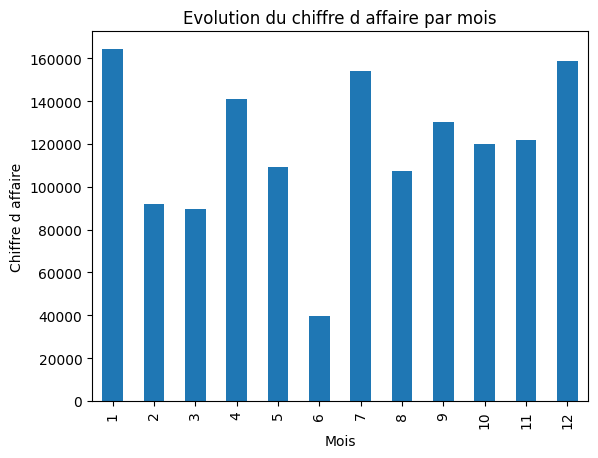

In [85]:
import matplotlib.pyplot as plt

def evolution_ca_par_mois(fichier):
    df=pd.read_csv(fichier)
    df['ChiffreAffaire'] = df['Quantité'] * df['PrixUnitaire']
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month
    ca_par_mois=df.groupby('Month')['ChiffreAffaire'].sum()
    ca_par_mois.plot(kind='bar',title='Evolution du chiffre d affaire par mois')
    plt.xlabel('Mois')
    plt.ylabel('Chiffre d affaire')
    plt.show()

evolution_ca_par_mois('ventes.csv')

## Partie E : Analyses supplementaires :


### identification du magasin avec le plus grand chiffres d'affaires cumule :

In [86]:
def magasin_plus_grand_ca(fichier):
    df=pd.read_csv(fichier)
    df['ChiffreAffaire'] = df['Quantité'] * df['PrixUnitaire']
    ca_par_magasin=df.groupby('Magasin')['ChiffreAffaire'].sum()
    magasin_max=ca_par_magasin.idxmax()
    ca_max=ca_par_magasin.max()
    print(f'Le magasin avec le plus grand chiffre d affaire est : {magasin_max} avec un chiffre d affaire de {ca_max}')

magasin_plus_grand_ca('ventes.csv')

Le magasin avec le plus grand chiffre d affaire est : Lyon avec un chiffre d affaire de 378414.07


### Mois ou les ventes ont ete plus fortes : 

In [87]:
def mois_plus_ventes(fichier):
    df=pd.read_csv(fichier)
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month
    ca_par_mois=df.groupby('Month')['Quantité'].sum()
    mois_max=ca_par_mois.idxmax()
    ca_max=ca_par_mois.max()
    print(f'Le mois ou les ventes ont ete les plus fortes est : {mois_max} avec un nombre de ventes de {ca_max}')

mois_plus_ventes('ventes.csv')

Le mois ou les ventes ont ete les plus fortes est : 1 avec un nombre de ventes de 265


### Le prix unitaire moyen par produit :

In [88]:
def prix_moyen_par_produit(fichier):
    df=pd.read_csv(fichier)
    prix_moyen=df.groupby('Produit')['PrixUnitaire'].mean()
    print(prix_moyen)

prix_moyen_par_produit('ventes.csv')

Produit
Chaussures    639.017368
Fromage       692.164800
Laptop        698.736250
Pain          600.907857
Pantalon      630.053929
Smartphone    765.570000
T-shirt       813.896000
TV            674.315625
Name: PrixUnitaire, dtype: float64


### Top 3 des categories qui generent plus de ventes en volume (quantite) : 

In [89]:
def top3_categories_plus_ventes(fichier):
    df=pd.read_csv(fichier)
    ca_par_categorie=df.groupby('Catégorie')['Quantité'].sum()
    top3=ca_par_categorie.sort_values(ascending=False)[:3]
    print(top3)

top3_categories_plus_ventes('ventes.csv')

Catégorie
Mode            751
Alimentaire     666
Électronique    614
Name: Quantité, dtype: int64


### Analyse de repartition des ventes par jour de la semaine (CA total) :

In [90]:
def ventes_par_jour_semaine(fichier):
    df=pd.read_csv(fichier)
    df['ChiffreAffaire'] = df['Quantité'] * df['PrixUnitaire']
    df['Date'] = pd.to_datetime(df['Date'])
    df['jours'] = df['Date'].dt.day_name()
    repartition_ventes=df.groupby('jours')['ChiffreAffaire'].sum()
    print(repartition_ventes)

ventes_par_jour_semaine('ventes.csv')

jours
Friday       206567.29
Monday       196628.40
Saturday     299074.28
Sunday       181840.76
Thursday     187072.36
Tuesday      122919.38
Wednesday    233992.48
Name: ChiffreAffaire, dtype: float64


### Histogramme de repartition des quantites vendues :

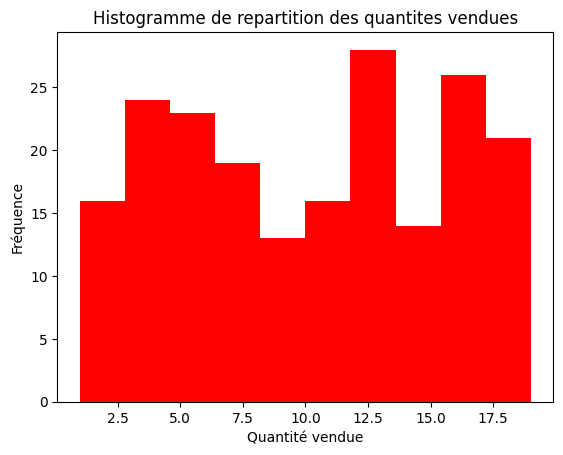

In [91]:
def histogramme_quantites_vendues(fichier):
    df=pd.read_csv(fichier)
    df['Quantité'].plot(kind='hist',histtype='stepfilled',color='r',title='Histogramme de repartition des quantites vendues')
    plt.xlabel('Quantité vendue')
    plt.ylabel('Fréquence')
    plt.show()

histogramme_quantites_vendues('ventes.csv')

# Traitement et modélisation avec Scikit-Learn

## Partie F : Préparation des données 

### selection des colonnes pour la modelisation :

In [92]:
from sklearn.preprocessing import LabelEncoder

def scaler_donnees(fichier):
    df=pd.read_csv(fichier)
    for col in ['Catégorie', 'Magasin']:
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])
    return(df)

scaler_donnees('ventes.csv')



,Date,Produit,Catégorie,Quantité,PrixUnitaire,Magasin
0,2022-04-13,Smartphone,1,10,1009.00,1
1,2023-03-12,Pantalon,2,2,782.86,3
2,2022-09-28,Pantalon,1,19,1159.62,0
3,2022-04-17,Fromage,2,9,782.64,0
4,2022-03-13,TV,1,7,1279.01,2
...,...,...,...,...,...,...
195,2023-04-17,T-shirt,0,17,1122.68,0
196,2022-08-21,Chaussures,0,8,756.57,1
197,2023-11-23,Laptop,2,2,352.16,1
198,2022-04-23,Chaussures,1,8,1349.86,0


### Séparer les données en X (features) et y (target) :

In [93]:
def separation_donnees(fichier):
    df = pd.read_csv(fichier)
    df['ChiffreAffaire'] = df['Quantité'] * df['PrixUnitaire']
    
    for col in ['Catégorie', 'Magasin']:
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])
    
    X = df[['Catégorie', 'Magasin', 'Quantité', 'PrixUnitaire']]
    y = df['ChiffreAffaire']
    return X, y

X, y = separation_donnees('ventes.csv')
print(X.head())
print(y.head())


   Catégorie  Magasin  Quantité  PrixUnitaire
0          1        1        10       1009.00
1          2        3         2        782.86
2          1        0        19       1159.62
3          2        0         9        782.64
4          1        2         7       1279.01
0    10090.00
1     1565.72
2    22032.78
3     7043.76
4     8953.07
Name: ChiffreAffaire, dtype: float64


### Découpage du  dataset en jeu d’entraînement et jeu de test (train_test_split) :

In [96]:
from sklearn.model_selection import train_test_split
def decoupage_train_test(fichier): 
    df = pd.read_csv(fichier)
    df['ChiffreAffaire'] = df['Quantité'] * df['PrixUnitaire']

    for col in ['Catégorie', 'Magasin']:
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

    X = df[[ 'Catégorie', 'Magasin', 'Quantité', 'PrixUnitaire']]
    y = df['ChiffreAffaire']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

def decoupage_game_test(fichier): 
    X_train, X_test, y_train, y_test = decoupage_train_test(fichier)
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)
    return X_train, X_test, y_train, y_test
decoupage_train_test('ventes.csv')
decoupage_game_test('ventes.csv')

X_train shape: (160, 4)
X_test shape: (40, 4)
y_train shape: (160,)
y_test shape: (40,)


(     Catégorie  Magasin  Quantité  PrixUnitaire
 79           1        1         8        696.49
 197          2        1         2        352.16
 38           1        1        12        364.02
 24           0        0        17       1176.56
 122          2        2        17        431.22
 ..         ...      ...       ...           ...
 106          2        0         1       1119.43
 14           2        0         3        323.38
 92           0        3        10        569.04
 179          0        3         3        213.96
 102          0        0         1        750.17
 
 [160 rows x 4 columns],
      Catégorie  Magasin  Quantité  PrixUnitaire
 95           2        0         3        321.11
 15           0        0        17        208.88
 30           0        3        16       1390.25
 158          1        1        13       1484.99
 128          0        1        11       1473.66
 115          1        2         5        910.63
 69           2        1        13        

# Partie G : Régression (prédiction du Chiffre d’Affaires)

### Entrainement d un model de regression lineaire pour predire CA a partir de quantite , pu , cat ,magasin :

score: 0.8667253532954468
score: 0.8667253532954468


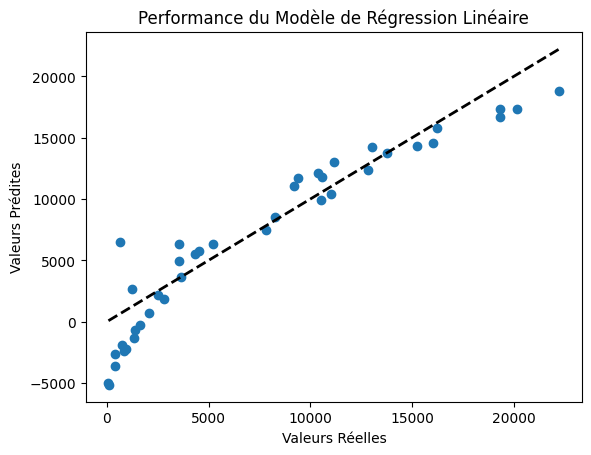

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
def decoupage_train_test(fichier): 
    df = pd.read_csv(fichier)
    df['ChiffreAffaire'] = df['Quantité'] * df['PrixUnitaire']

    for col in ['Catégorie', 'Magasin']:
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

    X = df[[ 'Catégorie', 'Magasin', 'Quantité', 'PrixUnitaire']]
    y = df['ChiffreAffaire']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

def train_regression_model(fichier):
    X_train, X_test, y_train, y_test = decoupage_train_test(fichier)
    model = LinearRegression()
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print (f'score: {score}')
    return model

def graph_model_performance(fichier):
    X_train, X_test, y_train, y_test = decoupage_train_test(fichier)
    model = train_regression_model(fichier)
    y_pred = model.predict(X_test)
    
    plt.scatter(y_test, y_pred)
    plt.xlabel('Valeurs Réelles')
    plt.ylabel('Valeurs Prédites')
    plt.title('Performance du Modèle de Régression Linéaire')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.show()


train_regression_model('ventes.csv')
graph_model_performance('ventes.csv')
